# Simple Toy Model

Model is from Chapter 3 of Systems Biology: Simulation of Dynamic Network States.

Bernhard Ø. Palsson. Systems Biology: Simulation of Dynamic Network States. Cambridge University Press, 2011. doi:10.1017/CBO9780511736179.

In [1]:
from os import path

from mass import MassMetabolite, MassModel, MassReaction, Simulation
from mass.io import json
from mass.visualization import plot_time_profile

## Model

In [2]:
model = MassModel('Simple_Toy')

Academic license - for non-commercial use only


## Metabolites

In [3]:
x1 = MassMetabolite('x1')
x2 = MassMetabolite('x2')
x3 = MassMetabolite('x3')
x4 = MassMetabolite('x4')

### Initial Conditions

In [4]:
x1.ic = 1
x2.ic = 0
x3.ic = 0
x4.ic = 0

## Reactions

In [5]:
v1 = MassReaction('v1')
v2 = MassReaction('v2')
v3 = MassReaction('v3', reversible=False)

v1.add_metabolites({x1 : -1, x2 : 1})
v2.add_metabolites({x2 : -1, x3 : 1})
v3.add_metabolites({x3 : -1, x4 : 1})

model.add_reactions([v1, v2, v3])

### Parameters

In [6]:
v1.kf = 1
v2.kf = 0.01
v3.kf = 0.0001

v1.Keq = 1
v2.Keq = 1

## Simulation

In [7]:
sim = Simulation(model, verbose=True)

conc_sol, flux_sol = sim.simulate(model, time=(0, 1e6), verbose=True)

Successfully loaded MassModel 'Simple_Toy' into RoadRunner.
Getting time points
Setting simulation values for 'Simple_Toy'
Simulating 'Simple_Toy'
Simulation for 'Simple_Toy' successful
Adding 'Simple_Toy' simulation solutions to output
Updating stored solutions


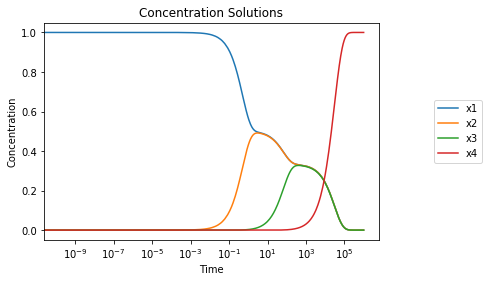

In [8]:
plot_time_profile(
    conc_sol, legend="right outside", plot_function="semilogx",
    xlabel="Time", ylabel="Concentration", 
    title=("Concentration Solutions", {"size": "large"}));

## Export

In [9]:
json.save_json_model(
    mass_model=model,
    filename=path.realpath(path.join("models", "Simple_Toy.json")))